<a href="https://colab.research.google.com/github/Clarke-Henshaw-Miles/extra/blob/master/DATA%20SCIENCE/Chapter5Attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To be completed at the Live Session and in your own time.

These set of examples we will help you get familiar with non parametric tests and correlations within a Jupyter notebook.   The questions coloured green are important practice for CA, particularly Question 5.

Before attempting these examples, please ensure you have read through [Chapter 5 Jupyter Notebook](https://github.com/haleygomez/Data-Science-2024/blob/main/blended_exercises/Chapter5/Chapter5.ipynb) and have completed the Learning Central **Chapter 5 quiz**.

***

#  Hypothesis Testing

## <font color=#30a64d>Question</font>

In the previous week, we used the datafile [worldpopulation.txt](https://github.com/haleygomez/Data-Science-2024/raw/main/blended_exercises/Chapter4/worldpopulation.txt) to estimate the correlation between the world population size measured over time.

1. Measure the correlation coefficient using the in built Python package for the Spearman $\rho$ statistic.

2. Measure it again but this time creating the functions to calculate $\rho$ from scratch.   You can use the in-built function to rank datasets from scipy.stats: `from scipy.stats import rankdata`.

### Answer

*Your answer here.*

In [3]:
import numpy as np
from scipy.stats import spearmanr
from scipy.stats import rankdata

#using in-built python function
data = np.loadtxt('https://github.com/haleygomez/Data-Science-2024/raw/main/blended_exercises/Chapter4/worldpopulation.txt')
corr, _ = spearmanr(data[0], data[1])
print('The Spearman rho correlation for the world population growth using in-built python function is: %.5f' % corr)

#calculating by hand
N = len(data[0])
#ranking data
r_x = rankdata(data[0])
r_y = rankdata(data[1])

#set up equation for spearman rho
def rho_s(rank_x, rank_y, N):
  top = np.sum(rank_x*rank_y) - (N*(N+1)**2/4)
  bottom = np.sqrt((np.sum(rank_x**2) - (N*(N+1)**2/4))*(np.sum(rank_y**2) - (N*(N+1)**2/4)))
  rho = top/bottom
  return rho

rho = rho_s(r_x, r_y, N)
print('The Spearman rho correlation for the world population growth using the equation is: %.5f' % rho)


The Spearman rho correlation for the world population growth using in-built python function is: 1.00000
The Spearman rho correlation for the world population growth using the equation is: 1.00000


***

# KS Test

## Question

Two near-by apple trees are in bloom in an otherwise empty field. One is a Whitney Crab the other is a Redwell. We want to test if bees prefer one tree to the other.

To do this we collect data. We use a stop watch to time how long a bee stays near a particular tree. We begin to time when the bee touches the tree, we stop timing when the bee is more than a metre from the tree. Unfortunately we did not get exactly the same number of bees for each tree as it started to rain.   The data is below (time is in seconds). Can we conclude anything based on our experiment?

redwell= 23.4, 30.9, 18.8, 23.0, 21.4, 1, 24.6, 23.8, 24.1, 18.7, 16.3, 20.3, 14.9, 35.4, 21.6, 21.2, 21.0, 15.0, 15.6, 24.0, 34.6, 40.9, 30.7, 24.5, 16.6, 1, 21.7, 1, 23.6, 1, 25.7, 19.3, 46.9, 23.3, 21.8, 33.3, 24.9, 24.4, 1, 19.8, 17.2, 21.5, 25.5, 23.3, 18.6, 22.0, 29.8, 33.3, 1, 21.3, 18.6, 26.8, 19.4, 21.1, 21.2, 20.5, 19.8, 26.3, 39.3, 21.4, 22.6, 1, 35.3, 7.0, 19.3, 21.3, 10.1, 20.2, 1, 36.2, 16.7, 21.1, 39.1, 19.9, 32.1, 23.1, 21.8, 30.4, 19.62, 15.5

whitney=16.5, 1, 22.6, 25.3, 23.7, 1, 23.3, 23.9, 16.2, 23.0, 21.6, 10.8, 12.2, 23.6, 10.1, 24.4, 16.4, 11.7, 17.7, 34.3, 24.3, 18.7, 27.5, 25.8, 22.5, 14.2, 21.7, 1, 31.2, 13.8, 29.7, 23.1, 26.1, 25.1, 23.4, 21.7, 24.4, 13.2, 22.1, 26.7, 22.7, 1, 18.2, 28.7, 29.1, 27.4, 22.3, 13.2, 22.5, 25.0, 1, 6.6, 23.7, 23.5, 17.3, 24.6, 27.8, 29.7, 25.3, 19.9, 18.2, 26.2, 20.4, 23.3, 26.7, 26.0, 1, 25.1, 33.1, 35.0, 25.3, 23.6, 23.2, 20.2, 24.7, 22.6, 39.1, 26.5, 22.7

### Answer

*Your answer here.*

Text(0.5, 0, 'Time bees spent at tree')

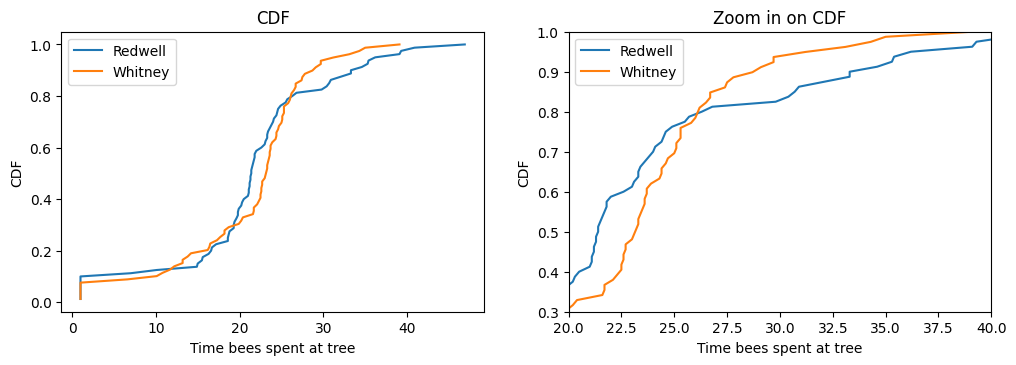

In [17]:
#null hypothesis is that there is no difference in the datasets
#ie bees do not prefer one tree over the other
import pylab as plt
%matplotlib inline

#defining data
redwell= [23.4, 30.9, 18.8, 23.0, 21.4, 1, 24.6, 23.8, 24.1, 18.7, 16.3, 20.3, 14.9, 35.4, 21.6, 21.2, 21.0, 15.0, 15.6, 24.0, 34.6, 40.9, 30.7, 24.5, 16.6, 1, 21.7, 1, 23.6, 1, 25.7, 19.3, 46.9, 23.3, 21.8, 33.3, 24.9, 24.4, 1, 19.8, 17.2, 21.5, 25.5, 23.3, 18.6, 22.0, 29.8, 33.3, 1, 21.3, 18.6, 26.8, 19.4, 21.1, 21.2, 20.5, 19.8, 26.3, 39.3, 21.4, 22.6, 1, 35.3, 7.0, 19.3, 21.3, 10.1, 20.2, 1, 36.2, 16.7, 21.1, 39.1, 19.9, 32.1, 23.1, 21.8, 30.4, 19.62, 15.5]
whitney = [16.5, 1, 22.6, 25.3, 23.7, 1, 23.3, 23.9, 16.2, 23.0, 21.6, 10.8, 12.2, 23.6, 10.1, 24.4, 16.4, 11.7, 17.7, 34.3, 24.3, 18.7, 27.5, 25.8, 22.5, 14.2, 21.7, 1, 31.2, 13.8, 29.7, 23.1, 26.1, 25.1, 23.4, 21.7, 24.4, 13.2, 22.1, 26.7, 22.7, 1, 18.2, 28.7, 29.1, 27.4, 22.3, 13.2, 22.5, 25.0, 1, 6.6, 23.7, 23.5, 17.3, 24.6, 27.8, 29.7, 25.3, 19.9, 18.2, 26.2, 20.4, 23.3, 26.7, 26.0, 1, 25.1, 33.1, 35.0, 25.3, 23.6, 23.2, 20.2, 24.7, 22.6, 39.1, 26.5, 22.7]

#make a function to plot the cumulative distribution function for the sample
def cdf(x):
    xs = np.sort(x)
    # this basically makes a cumulative distribution function
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys


#calculating cdf for both types of tree
r_t, r_cdf = cdf(redwell)
w_t, w_cdf = cdf(whitney)

#making plots
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.plot(r_t, r_cdf, label='Redwell')
plt.plot(w_t, w_cdf, label='Whitney')
#plt.ylim(0.1,1)
plt.legend()
plt.title('CDF')
plt.ylabel('CDF')
plt.xlabel('Time bees spent at tree')

#second plot zoomed in on cdf
plt.subplot(222)
plt.plot(r_t,r_cdf,label='Redwell')
plt.plot(w_t,w_cdf,label='Whitney')
plt.xlim(20,40)
plt.ylim(0.3,1)
plt.legend()
plt.title('Zoom in on CDF')
plt.ylabel('CDF')
plt.xlabel('Time bees spent at tree')

In [19]:
from scipy.stats import ks_2samp
results = ks_2samp(redwell, whitney)

print('The p-value for the KS test is: %.5f' % results.pvalue)
print('The statistic (D) for the KS test is: %.5f' % results.statistic)

The p-value for the KS test is: 0.03386
The statistic (D) for the KS test is: 0.22041


The result is a 96.5% chance of these distributions being different.

This is below the significance level of 0.05.

We can reject the null hypothesis that the bees do not prefer one tree over another.

***

# Chi-square test

## Question

You publish flyers for an event in three different colours and want to test whether the colour has a significant affect on whether people take them. The data is available below.  Use the $\chi^2$ test to do this, and calculate the probability of the significance of the result.

| |white | light blue | neon pink | Totals|
|---|---|---|---|---|
|Take | 32| 38 | 20| 90|
|Don't take | 8| 22 |30 | 60|
|Totals | 40|60 | 50| 150|

### Answer

*Your answer here.*

***